# Probability | IMDB 5000 Movies | Shannon Tully

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from datetime import date

In [2]:
df = pd.read_csv('./movie_metadata.csv', error_bad_lines=False)
df = df.drop_duplicates()
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# What's the probability that a movie was longer than an hour and a half? Two hours?

In [3]:
more_than_90 = df[df.duration > 90.0]
prob_more_than_90 = more_than_90.count() / df.count()
'{:.2f}%'.format(prob_more_than_90['duration'] * 100)

'81.02%'

In [4]:
more_than_120 = df[df.duration > 120.0]
prob_more_than_120 = more_than_120.count() / df.count()
'{:.2f}%'.format(prob_more_than_120['duration'] * 100)

'21.31%'

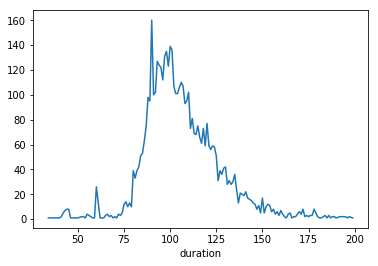

In [26]:
df.duration[(df.duration < 200) & (df.duration > 30)].groupby(df.duration).count().plot()

# What's the probability that a movie was directed by Stephen Spielberg?

In [6]:
director_steve = df[df.director_name == 'Steven Spielberg']
prob_director_steve = director_steve.count() / df.count()
'{:.2f}%'.format(prob_director_steve['director_name'] * 100)

'0.53%'

# What's the probability that a movie directed by Clint Eastwood will gross under budget?

In [7]:
director_clint = df[df.director_name == 'Clint Eastwood']
gross_clint = director_clint[director_clint.gross < director_clint.budget]
prob_gross_clint = gross_clint.count() / director_clint.count()
'{:.2f}%'.format(prob_gross_clint['gross'] * 100)

'36.84%'

# What's the probability that a movie generally grossed more than its budget?

In [8]:
gross = df[df.gross > df.budget]
prob_gross_df = gross.count() / df.count()
'{:.2f}%'.format(prob_gross_df['gross'] * 100)

'49.27%'

# What's the probability that a movie grossed over the average gross of this data set?

In [9]:
avg_gross = df.gross.mean()
over_gross = df[df.gross > avg_gross].count()
prob_over_gross = over_gross / df.count()
'{:.2f}%'.format(prob_over_gross['gross'] * 100)

'31.91%'

# For ratings we'll consider a movie with at least a 6/10 to be worth renting, if not seeing in theaters. A false positive would be a movie that was highly-rated but did poorly in the box office (gross < budget). A false negative would be a movie that was poorly-rated but did great in the box office (gross > budget).

# In the IMDB dataset, what are the false positive and false negative rates? Can you provide some examples of each?

In [10]:
rating_high = df[df.imdb_score >= 6.0]
rating_low = df[df.imdb_score < 6.0]
rating_high[rating_high.gross < rating_high.budget].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
11,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0
12,Color,Marc Forster,403.0,106.0,395.0,393.0,Mathieu Amalric,451.0,168368427.0,Action|Adventure,...,1243.0,English,UK,PG-13,200000000.0,2008.0,412.0,6.7,2.35,0


In [11]:
rating_low[rating_low.gross > rating_low.budget].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
37,Color,Michael Bay,378.0,165.0,0.0,808.0,Sophia Myles,974.0,245428137.0,Action|Adventure|Sci-Fi,...,918.0,English,USA,PG-13,210000000.0,2014.0,956.0,5.7,2.35,56000
122,Color,Shawn Levy,185.0,105.0,189.0,1000.0,Rami Malek,49000.0,177243721.0,Adventure|Comedy|Family|Fantasy,...,209.0,English,USA,PG,150000000.0,2009.0,3000.0,5.9,2.35,2000
174,Color,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,292298923.0,Adventure|Drama|Fantasy|Romance,...,329.0,English,USA,PG-13,120000000.0,2012.0,17000.0,5.5,2.35,65000
213,Color,Louis Leterrier,344.0,106.0,255.0,850.0,Jason Flemyng,14000.0,163192114.0,Action|Adventure|Fantasy,...,637.0,English,USA,PG-13,125000000.0,2010.0,1000.0,5.8,2.35,15000
222,Color,Tim Story,262.0,92.0,167.0,702.0,Ioan Gruffudd,11000.0,131920333.0,Action|Adventure|Sci-Fi|Thriller,...,436.0,English,USA,PG,130000000.0,2007.0,2000.0,5.6,2.35,0


# If I’m a production studio exec and Tom Hanks is starring in my movie but I’m feeling uncertain about whether we should keep him (will he make as much money as we want?), tell me should I keep him in the movie or switch him out for Harrison Ford?

In [12]:
actor_tom = df[(df.actor_1_name == 'Tom Hanks') | (df.actor_2_name == 'Tom Hanks') | (df.actor_3_name == 'Tom Hanks')]
gross_tom = actor_tom[actor_tom.gross > actor_tom.budget]
prob_gross_tom = gross_tom.count() / actor_tom.count()
'{:.2f}%'.format(prob_gross_tom['gross'] * 100)

'78.57%'

In [13]:
actor_ford = df[(df.actor_1_name == 'Harrison Ford') | (df.actor_2_name == 'Harrison Ford') | (df.actor_3_name == 'Harrison Ford')]
gross_ford = actor_ford[actor_ford.gross > actor_ford.budget]
prob_gross_ford = gross_ford.count() / actor_ford.count()
'{:.2f}%'.format(prob_gross_ford['gross'] * 100)

'66.67%'

# Same as above, but I’m judging on the ratings of the movie instead of the gross/budget.

In [14]:
actor_tom = df[(df.actor_1_name == 'Tom Hanks') | (df.actor_2_name == 'Tom Hanks') | (df.actor_3_name == 'Tom Hanks')]
actor_tom['imdb_score'].mean()

7.3999999999999995

In [15]:
actor_ford = df[(df.actor_1_name == 'Harrison Ford') | (df.actor_2_name == 'Harrison Ford') | (df.actor_3_name == 'Harrison Ford')]
actor_ford['imdb_score'].mean()

7.075862068965518

# What’s the probability that a movie’s length will be between 1hr 10mins and 1h 30mins?

In [16]:
between_70_90 = df[(df.duration < 90.0) & (df.duration > 70.0)]
prob_between_70_90 = between_70_90.count() / df.count()
'{:.2f}%'.format(prob_between_70_90['duration'] * 100)

'13.25%'

# How does the distribution of movie budgets compare to the movie gross values?

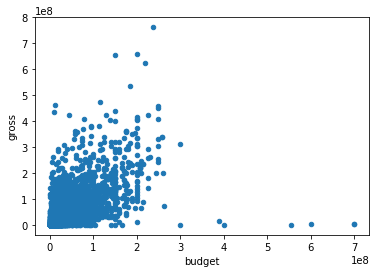

In [17]:
df[['gross', 'budget']][df.budget < 1e9].plot(x='budget', y='gross', kind='scatter')

# Which genre trends toward the highest gross-to-budget ratio? You may have to do some extra parsing to answer this question.

In [18]:
df['gross_budget'] = df['gross'] / df['budget']
genres_table = df[['genres', 'gross_budget']].groupby(df['genres']).mean()
genres_table.sort_values('gross_budget', ascending=False).head()

,gross_budget
genres,
Biography|Documentary,2715.660550
Horror,227.748305
Comedy|Documentary|Drama,177.374892
Adventure|Family|Romance,79.105200
Animation|Family|Fantasy|Musical,62.442910


In [19]:
# Megan did this
genre_gross = df[['genres', 'gross_budget']]

all_genres = list(set('|'.join(df.genres.values).split('|')))
groups = genre_gross.genres.map(lambda cell: tuple(genre in cell for genre in all_genres))
print('presence of specific genres in a movie\n')
groups.head()

presence of specific genres in a movie



0    (False, True, False, False, False, False, True...
1    (False, True, False, False, False, False, True...
2    (False, True, False, False, False, False, Fals...
3    (False, False, False, False, False, False, Fal...
4    (False, False, False, False, False, False, Fal...
Name: genres, dtype: object

In [20]:
genre_gross.index = pd.MultiIndex.from_tuples(groups.values, names=all_genres)
print('convert tuples to indexes')
genre_gross.head() # note: all the indexes are actually filled!

convert tuples to indexes


genres  \
Reality-TV Adventure Short War   Horror News  Fantasy History Mystery Action Thriller Film-Noir Game-Show Animation Western Sci-Fi Sport Musical Documentary Biography Music Comedy Romance Family Crime Drama                                    
False      True      False False False  False True    False   False   True   False    False     False     False     False   True   False False   False       False     False False  False   False  False False  Action|Adventure|Fantasy|Sci-Fi   
                                                                                                                            False  False False   False       False     False False  False   False  False False         Action|Adventure|Fantasy   
                                              False   False   False   True   True     False     False     False     False   False  False False   False       False     False False  False   False  False False        Action|Adventure|Thriller   
           False     False False False  False False   False   False   True   True     False     False     False     False   False  False False   False       False     False False  False   False  False False                  Action|Thriller   
                                                                      False  False    False     False     False     False   False  False False   True        False     False False  False   False  False False                      Documentary   

                                                                                                                                                                                                                gross_budget  
Reality-TV Adventure Short War   Horror News  Fantasy History Mystery Action Thriller Film-Noir Game-Show Animation Western Sci-Fi Sport Musical Documentary Biography Music Comedy Romance Family Crime Drama                
False      True      False False False  False True    False   False   True   False    False     False     False     False   True   False False   False       False     False False  False   False  False False      3.208885  
                                                                                                                            False  False False   False       False     False False  False   False  False False      1.031347  
                                              False   False   False   True   True     False     False     False     False   False  False False   False       False     False False  False   False  False False      0.816629  
           False     False False False  False False   False   False   True   True     False     False     False     False   False  False False   False       False     False False  False   False  False False      1.792523  
                                                                      False  False    False     False     False     False   False  False False   True        False     False False  False   False  False False           NaN

In [21]:
# Create a new data from the new genre data
genre_data = {'gross_budget_mean': [], 'genre': []}
for g in all_genres:
    genre_data['gross_budget_mean'].append(genre_gross.xs(True, level=g).gross_budget.mean())
    genre_data['genre'].append(g)
pd.DataFrame(genre_data).sort_values('gross_budget_mean', ascending=False).head()
# Thanks Megan

,genre,gross_budget_mean
18,Documentary,47.813029
4,Horror,31.350402
19,Biography,13.219205
2,Short,5.533308
20,Music,3.964569


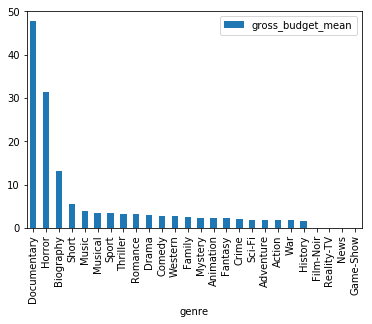

In [22]:
pd.DataFrame(genre_data).sort_values('gross_budget_mean', ascending=False).plot(x='genre', kind='bar')

# Nicolas Cage is known for starring in some pretty bad movies. Are his movies statistically significantly worse (i.e. in rating) than the rest of the IMDB 5000+?

In [23]:
df['imdb_score'].mean()

6.441056422569028

In [24]:
actor_nick = df[(df.actor_1_name == 'Nicolas Cage') | (df.actor_2_name == 'Nicolas Cage') | (df.actor_3_name == 'Nicolas Cage')]
actor_nick['imdb_score'].mean()

6.245454545454545

# Have any years grossed a statistically-significant higher amount than the other years?

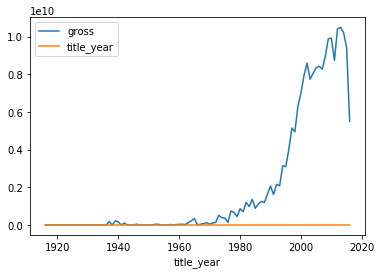

In [25]:
df[['gross', 'title_year']].groupby(df.title_year).sum().plot()